In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
DATA_DIR = "drive/MyDrive/AI_X/"

In [3]:
import os
import PIL
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt 

import tensorflow as tf
from PIL import Image
from sklearn import preprocessing
from tensorflow.keras.models import load_model

In [190]:
wav_dir = DATA_DIR+'wav/피아노.wav'
image_dir = DATA_DIR+"111.jpg"
model_dir = DATA_DIR+"h5/null/model_CNN_2_97_best.h5"
csv_dir = DATA_DIR+"csv/image_dir_2_.csv"

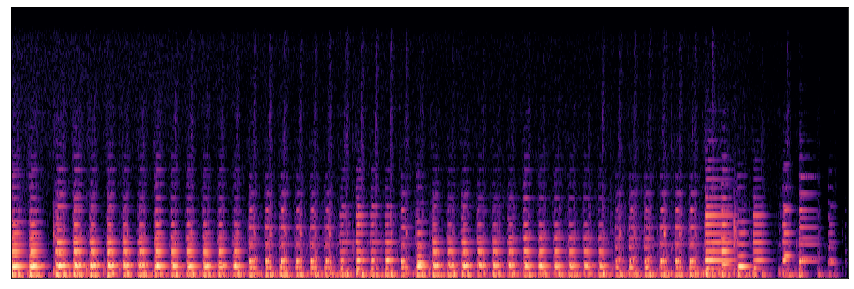

In [191]:
wav = librosa.load(wav_dir, 16000)[0]
y = librosa.stft(wav, n_fft=256, hop_length=128, win_length=256)

magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)

D_octave = np.abs(librosa.stft(wav))

#x = librosa.load(wav_dir,16000)[0]
#y = librosa.stft(x, n_fft=128, hop_length=64, win_length=128)

plt.figure(figsize=(15,5))
#librosa.display.specshow(log_spectrogram, sr=sr, hop_length=64)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=64)
plt.savefig(image_dir)

In [192]:
images = None

loaded_model = load_model(model_dir)
image_df = pd.read_csv(csv_dir)
le = preprocessing.LabelEncoder()
le.fit(image_df.Label)
image = PIL.Image.open(image_dir).crop((136,44,972,314)).convert('RGB').resize((150,50))
image = np.expand_dims(np.array(image, dtype=int), axis=0)
images = image if images is None else np.append(images, image, axis=0)
croppedImage = np.array(images)/255
print(le.inverse_transform(np.array([np.argmax(pred) for pred in loaded_model.predict(croppedImage)])))

1/1 [==============================] - 0s 184ms/step
['망치질소리']


In [14]:
print(int(np.array([np.argmax(loaded_model.predict(croppedImage))])))

1/1 [==============================] - 0s 36ms/step
0


In [35]:
loaded_model.predict(croppedImage)

1/1 [==============================] - 0s 31ms/step


array([[2.3920877e-05, 4.5456048e-09, 1.1063004e-09, 1.1558767e-07,
        9.4642949e-10, 7.5855245e-13, 3.8360793e-02, 1.2502738e-07,
        3.2679040e-10, 4.7951129e-05, 2.0754414e-05, 9.6152133e-01,
        1.1657546e-09, 2.7275462e-07, 2.8764499e-10, 7.2323559e-07,
        9.7780166e-09, 2.1963340e-05, 1.0516540e-09, 2.0412458e-06]],
      dtype=float32)

In [43]:
for pair in zip(le.classes_, loaded_model.predict(croppedImage)[0]):
  x = pair

pairs = list(zip(le.classes_, loaded_model.predict(croppedImage)[0]))
print(pairs)

1/1 [==============================] - 0s 26ms/step
[('가구끄는소리', 2.3920877e-05), ('강아지짓는소리', 4.545605e-09), ('골프연습장의타구음', 1.1063004e-09), ('골프퍼팅(골굴리는소리)', 1.1558767e-07), ('등하원아이들떠드는소리', 9.464295e-10), ('런닝머신에서뛰는소리', 7.5855245e-13), ('망치질소리', 0.038360793), ('문여닫는소리', 1.2502738e-07), ('바이올린연주소리', 3.267904e-10), ('샤워할때물소리', 4.795113e-05), ('세탁기소리', 2.0754414e-05), ('소리없음', 0.9615213), ('식기세척기소리', 1.1657546e-09), ('심야에이륜차가빠르게주행하는소리', 2.7275462e-07), ('심야에자동차가빠르게주행하는소리', 2.87645e-10), ('에어컨실외기의가동소리', 7.232356e-07), ('진공청소기소리', 9.778017e-09), ('피아노연주소리', 2.196334e-05), ('화장실물내리는소리', 1.051654e-09), ('발걸음소리', 2.0412458e-06)]


In [62]:
pairs = list(zip(le.classes_, loaded_model.predict(croppedImage)[0]))
vul, num = zip(sorted(pairs, key=lambda student: student[1], reverse=True)[0])
print(int(num[0]*100))

1/1 [==============================] - 0s 29ms/step
96
